# Support Vector Machines

Es un conjunto de algortimo de aprendizaje sueprvisado.

- Es una forma de clustering y clasficiación de data con alta dimensionalidad, o en otras palabras con muchso features.

- Encuentra vectores soportes de alta dimensionaldiad, o hiperplanos.

- Usa un Kernel Trick para representar datos en espacios de alta dimensionalidad para encontrar hiperplanos que pueden no estar aprantemente en otras dimensiones más bajas.


Existe en esta categoría algo llamado Support Vector Clasifiers, que permiten clasificar la data en función de un kernel que hace diferntes ajustes, lienales, polinomicos y demás.

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [1]:
import numpy as np
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets

En el siguiente código la función de crear cluster tiene el propósito de genera un conjunto de datos apropiado para clusters y puntos.

In [2]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = [] # Es el número de clusters
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [8]:
(X, y) = createClusteredData(100, 5)

C:\Users\Root\AppData\Local\Temp\ipykernel_9076\2246226973.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


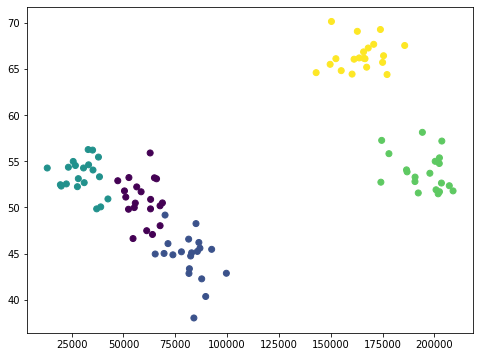

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Los datos para el SVM deben escalarse con el fin de que pueda operar correctamente

C:\Users\Root\AppData\Local\Temp\ipykernel_9076\2827330020.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


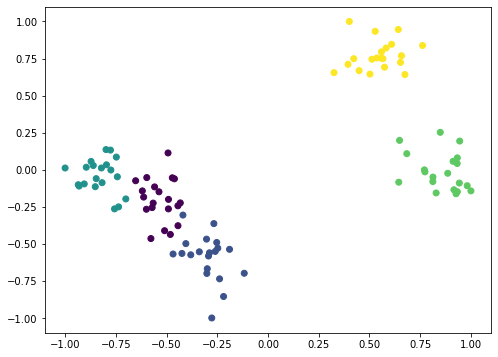

In [13]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

En este caso usaremos un kernel lineal para hacer la partición del gráfico en clusters. Entrenamos a nuestro modelo con la data generada de Ingresos y edad.

In [4]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

El setear una conjunto de puntos en forma de grid y clasificarlos todos podemos rednerizar cada cluster en diferentes colores.

C:\Users\Root\AppData\Local\Temp\ipykernel_9076\1826441922.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


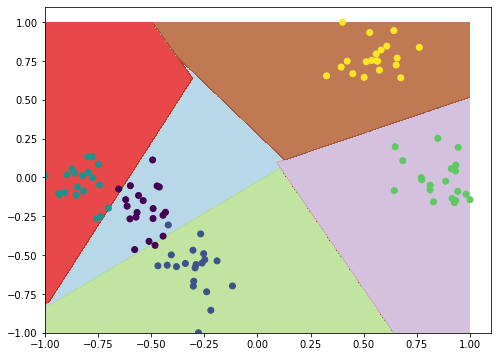

In [5]:
# Creamos una meustra.
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]  
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

In [6]:
# La data nueva debe transformarse siempre antes de entrar a un modelo para poder ajustar la predicción.
print(svc.predict(scaling.transform([[200000, 40]]))) 

[3]


In [7]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?